# Mask Detection
## CNN
### Parthasarathy M

Dataset - https://www.kaggle.com/datasets/omkargurav/face-mask-dataset/versions/1

### Importing the Libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

### Loading the Datasets

In [2]:
with_mask_files = os.listdir('C:/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

without_mask_files = os.listdir('C:/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']
['with_mask_995.jpg', 'with_mask_996.jpg', 'with_mask_997.jpg', 'with_mask_998.jpg', 'with_mask_999.jpg']
['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']
['without_mask_995.jpg', 'without_mask_996.jpg', 'without_mask_997.jpg', 'without_mask_998.jpg', 'without_mask_999.jpg']


### Checking Image Count for each Datasets

In [3]:
print('Number of images with mask:', len(with_mask_files))

print('Number of images without mask:', len(without_mask_files))      

Number of images with mask: 3725
Number of images without mask: 3828


### Assigning Labels for the both the class of images

#### with mast --> 1

#### without mask -->0

In [4]:
with_mask_labels = [1]*len(with_mask_files)

without_mask_labels = [0]*len(without_mask_files)

print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

print(len(with_mask_labels))

print(len(without_mask_labels))

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]
3725
3828


In [5]:
# combining both the list to a single list

combined_labels = with_mask_labels + without_mask_labels

print(len(combined_labels))

print(combined_labels[0:5])

print(combined_labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


### Displaying some random images

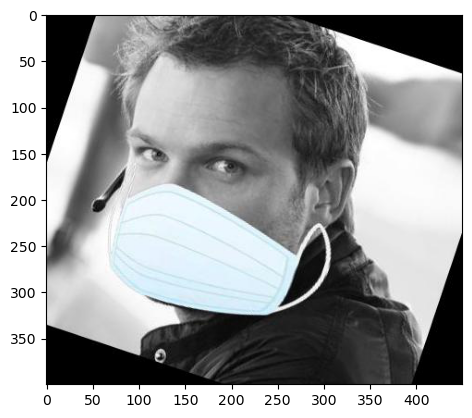

In [6]:
img = mpimg.imread('C:/data/with_mask/with_mask_2002.jpg')
imgplot = plt.imshow(img)

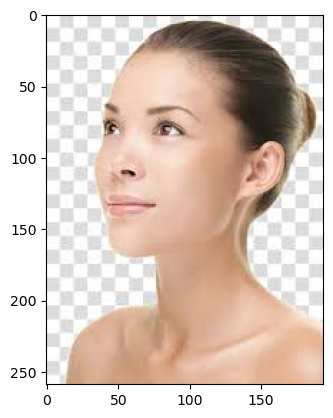

In [7]:
img = mpimg.imread('C:/data/without_mask/without_mask_2925.jpg')


imgplot = plt.imshow(img)

### Image Processing

#### 1. Resize the Images into a single size

#### 2. Convert the images to numpy arrays

In [8]:
with_mask_path = 'C:/data/with_mask/'
without_mask_path = 'C:/data/without_mask/'

data = []

for img_file in with_mask_files:
    image = Image.open(with_mask_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

for img_file in without_mask_files:
    image = Image.open(without_mask_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

C:\Users\melvi\anaconda3\Lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [9]:
len(data)

7553

In [10]:
data[0]

array([[[50, 58, 31],
        [46, 54, 34],
        [56, 59, 42],
        ...,
        [26, 32, 25],
        [29, 33, 18],
        [34, 40, 16]],

       [[47, 55, 30],
        [49, 57, 37],
        [59, 63, 40],
        ...,
        [18, 21, 11],
        [38, 42, 31],
        [31, 41, 22]],

       [[52, 58, 37],
        [50, 59, 38],
        [59, 64, 36],
        ...,
        [45, 44, 30],
        [29, 35, 28],
        [20, 30, 17]],

       ...,

       [[63, 72, 37],
        [66, 76, 41],
        [74, 84, 50],
        ...,
        [ 5,  4,  0],
        [20, 19, 15],
        [17, 17, 12]],

       [[59, 71, 34],
        [60, 70, 39],
        [68, 76, 50],
        ...,
        [16, 15, 12],
        [15, 13, 10],
        [13,  9,  7]],

       [[53, 69, 29],
        [54, 64, 37],
        [57, 63, 43],
        ...,
        [18, 18, 16],
        [16, 13, 12],
        [20, 12, 13]]], dtype=uint8)

In [11]:
type(data[0])

numpy.ndarray

In [12]:
data[0].shape

(128, 128, 3)

### Converting image list and label list to numpy arrays

In [13]:
X = np.array(data)

y = np.array(combined_labels)

print(type(X), type(y))

print(X.shape, y.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(7553, 128, 128, 3) (7553,)


### Splitting the data into train & test

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 1)


In [15]:
print(X.shape, X_train.shape, X_test.shape, y.shape, y_train.shape, y_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3) (7553,) (6042,) (1511,)


In [16]:
# sclaing the data
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

### Bulding a Convolutional Neural Network (CNN)

In [22]:
import tensorflow as tf
from tensorflow import keras

no_of_classes = 2

In [23]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(no_of_classes, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 57600)             0         
                                                                 
 dense_3 (Dense)             (None, 128)              

### Compile & Train the CNN Model

In [24]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['acc'])

In [25]:
history = model.fit(X_train_scaled, y_train, validation_split = 0.1, epochs = 7)

Epoch 1/7
170/170 [==============================] - 427s 3s/step - loss: 0.4648 - acc: 0.7949 - val_loss: 0.2748 - val_acc: 0.8810
Epoch 2/7
170/170 [==============================] - 248s 1s/step - loss: 0.2798 - acc: 0.8884 - val_loss: 0.2292 - val_acc: 0.9025
Epoch 3/7
170/170 [==============================] - 226s 1s/step - loss: 0.2355 - acc: 0.9036 - val_loss: 0.2096 - val_acc: 0.9190
Epoch 4/7
170/170 [==============================] - 236s 1s/step - loss: 0.2272 - acc: 0.9154 - val_loss: 0.2535 - val_acc: 0.9124
Epoch 5/7
170/170 [==============================] - 237s 1s/step - loss: 0.1827 - acc: 0.9272 - val_loss: 0.2282 - val_acc: 0.9140
Epoch 6/7
170/170 [==============================] - 229s 1s/step - loss: 0.1593 - acc: 0.9354 - val_loss: 0.2220 - val_acc: 0.9207
Epoch 7/7
170/170 [==============================] - 231s 1s/step - loss: 0.1321 - acc: 0.9461 - val_loss: 0.2386 - val_acc: 0.9025


### Model Evaluation

In [26]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print('Test Accuracy = ', accuracy)

48/48 [==============================] - 8s 167ms/step - loss: 0.1940 - acc: 0.9239
Test Accuracy =  0.9238914847373962


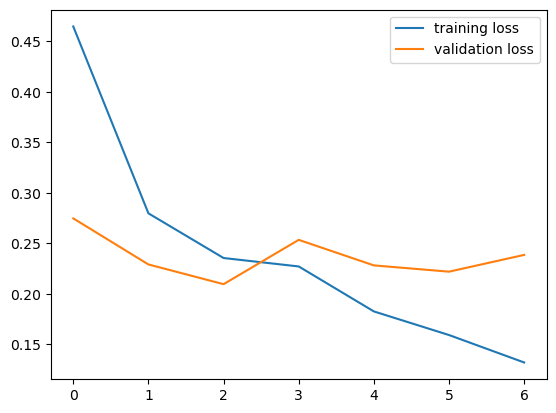

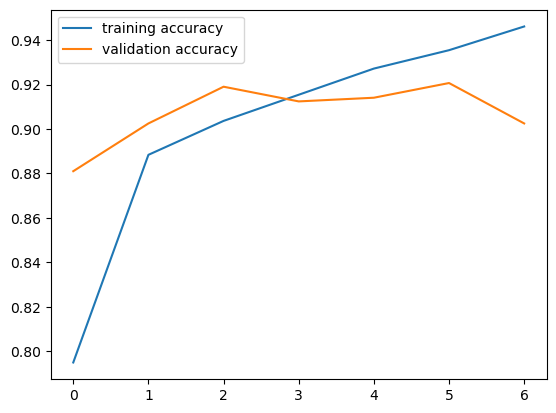

In [27]:
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

plt.plot(history.history['acc'], label = 'training accuracy')
plt.plot(history.history['val_acc'], label = 'validation accuracy')
plt.legend()
plt.show()

### Predictive System

1/1 [==============================] - 0s 89ms/step
[[7.933222e-05 9.968070e-01]]
1
The person in the image is wearing a mask


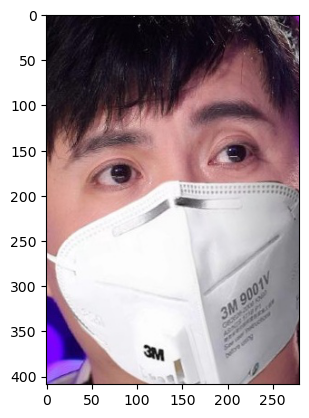

In [28]:
input_image_path = 'C:/data/with_mask/with_mask_102.jpg'
input_image = mpimg.imread(input_image_path)
imgplot = plt.imshow(input_image)
input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized / 255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)
if input_pred_label == 1:
    print('The person in the image is wearing a mask')
else:
    print('The person in the image is not wearing a mask')


1/1 [==============================] - 0s 24ms/step
[[0.9967669  0.02384234]]
0
The person in the image is not wearing a mask


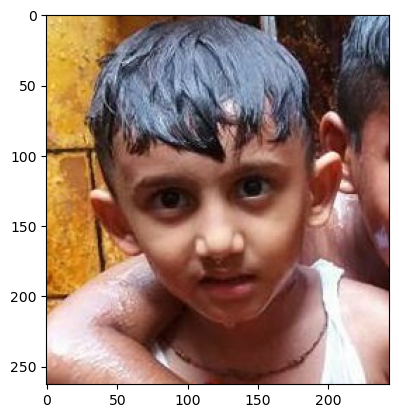

In [29]:
input_image_path = 'C:/data/without_mask/without_mask_1022.jpg'
input_image = mpimg.imread(input_image_path)
imgplot = plt.imshow(input_image)
input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized / 255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)
if input_pred_label == 1:
    print('The person in the image is wearing a mask')
else:
    print('The person in the image is not wearing a mask')
